# <font color=orange>**Evrisimsel Sinir Aglari ile Nesne Tespiti**</font> <font color=gray>**(CNN)**</font>

## <font color=orange>**R-CNN ile Nesne Tespiti**</font> <font color=gray>**-**</font>

In [7]:
import cv2
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Sequential, load_model

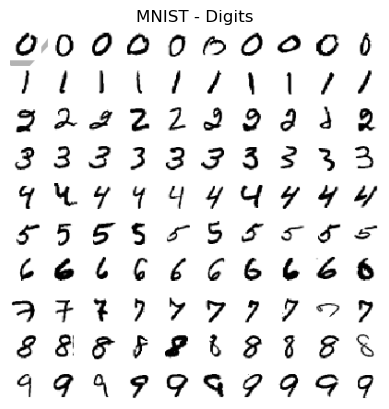

In [8]:
image = cv2.imread('mnist.png')
plt.imshow(image), plt.axis('off'), plt.title('MNIST - Digits');

start
1/1 [==============================] - 0s 63ms/step


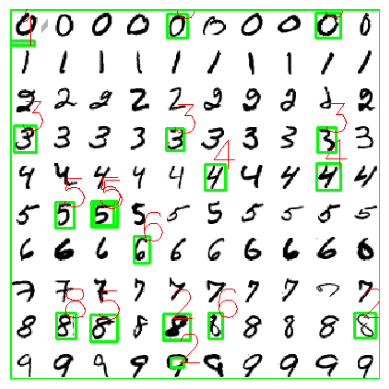

In [9]:
# İlklendir ss

ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchQuality()

print('start')
rects = ss.process()

proposals = []
boxes = []
output = image.copy()

for (x,y,w,h) in rects[:20]:
    # her bir kutu icin rastgele renk belirleme
    color = [random.randint(0,255) for j in range(0,3)]
    cv2.rectangle(output, (x,y), (x+w, y+h), color, 2)
    
    roi = image[y:y+h, x:x+w]
    roi = cv2.resize(roi, dsize = (32,32), interpolation = cv2.INTER_LANCZOS4)
    
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    roi = img_to_array(roi)
    
    proposals.append(roi)
    boxes.append((x,y,x+w,y+h))
    
proposals = np.array(proposals, dtype = 'float64')
boxes = np.array(boxes, dtype = 'int32')

'''pickle_in = open('model_trained_v4.p', 'rb')
model = pickle.load(pickle_in)'''

model = load_model('modelWeights.h5')
proba = model.predict(proposals)

number_list = []
idx = []

for i in range(len(proba)):
    max_prob = np.max(proba[i,:])
    if max_prob > 0.95:
        idx.append(i)
        number_list.append(np.argmax(proba[i]))
        
for i in range(len(number_list)):
    j = idx[i]
    cv2.rectangle(image, (boxes[j,0], boxes[j,1]),(boxes[j,2],boxes[j,3]),(0,255,0), 2)
    cv2.putText(image, str(np.argmax(proba[j])),(boxes[j,0] + 5, boxes[j,1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0,0), 1)
    
    plt.imshow(image), plt.axis('off');